<a href="https://colab.research.google.com/github/Marcos-VM-1708/bia/blob/main/Parkinson_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import pandas as pd
from imutils.paths import list_images
from sklearn.preprocessing import LabelEncoder

def open_data(caminho_ht, caminho_pk):
  # health
  data_ht = str(caminho_ht)                                                                 # caminho das imagens Spiral-Training-Healthy
  data_ht = list(list_images(data_ht))                                                      # elementos da pasta  
  healthy = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], data_ht))             # diagnostico
  
  # parkinson
  data_pk = str(caminho_pk)                                                                 # caminho das imagens Spiral-Training-Pakinson
  data_pk = list(list_images(data_pk))                                                      # elementos da pasta 
  parkinson = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], data_pk))           # diagnostico

  imagens = data_ht + data_pk
  diagnostico = healthy + parkinson

  series_img = pd.Series(imagens, name="imagens")
  series_dgn = pd.Series(diagnostico, name="diagnostico") 
  
  # series parkinson
  encode = LabelEncoder()
  target = encode.fit_transform(diagnostico)
  series_trg = pd.Series(target, name = "target")
  base_data_v1 = pd.concat([series_img, series_dgn, series_trg], axis = 1)
  
  return base_data_v1

In [ ]:
# gera base de dados pra teste e treino
train = open_data("/content/drive/Shareddrives/TRABALHO_IP/BD_Oficial4/spiral/training/healthy",
                  "/content/drive/Shareddrives/TRABALHO_IP/BD_Oficial4/spiral/training/parkinson")

test = open_data("/content/drive/Shareddrives/TRABALHO_IP/BD_Oficial4/spiral/testing/healthy",
                 "/content/drive/Shareddrives/TRABALHO_IP/BD_Oficial4/spiral/testing/parkinson")


In [ ]:
test.head(4)

,imagens,diagnostico,target
0,/content/drive/Shareddrives/TRABALHO_IP/BD_Ofi...,healthy,0
1,/content/drive/Shareddrives/TRABALHO_IP/BD_Ofi...,healthy,0
2,/content/drive/Shareddrives/TRABALHO_IP/BD_Ofi...,healthy,0
3,/content/drive/Shareddrives/TRABALHO_IP/BD_Ofi...,healthy,0


In [ ]:
import cv2
import numpy as np
  
# imagens:
def process_img(path):
  data_img = []
  for i in np.array(path["imagens"]):
    img = cv2.imread(i,0)              # proceçamento de imagem
    img2 = cv2.resize(img, (256, 256)) # resize das imagens 
    img2 = np.where(img2 > 0.1, 1, 0)
    data_img.append(img2)
  
  temp = pd.Series(data_img, name="imagem process")
  data_img = temp.apply(lambda x: np.array(x.data).flatten()).tolist()
  data_img = pd.Series(data_img, name="imagem_process")
  
  base_data_v2 = pd.concat([path, data_img], axis = 1)
  return base_data_v2

In [ ]:
dataBase_test = process_img(test)
dataBase_train = process_img(train)

In [ ]:
# embaralhamento
dataBase_train = dataBase_train.sample(frac=1).reset_index(drop=True)
dataBase_test = dataBase_test.sample(frac=1).reset_index(drop=True)

In [ ]:
dataBase_test.head(4)

,imagens,diagnostico,target,imagem_process
0,/content/drive/Shareddrives/TRABALHO_IP/BD_Ofi...,healthy,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,/content/drive/Shareddrives/TRABALHO_IP/BD_Ofi...,parkinson,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,/content/drive/Shareddrives/TRABALHO_IP/BD_Ofi...,healthy,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,/content/drive/Shareddrives/TRABALHO_IP/BD_Ofi...,parkinson,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
dataBase_train[['target', 'diagnostico']].value_counts()

target  diagnostico
0       healthy        864
1       parkinson      864
dtype: int64

In [ ]:
x_train = np.vstack(dataBase_train['imagem_process'].tolist()) 
y_train = dataBase_train["target"]

In [ ]:
x_test = np.vstack(dataBase_test['imagem_process'].tolist()) 
y_test = dataBase_test["target"]

In [ ]:
print("Forma das variáveis de entrada do conjunto de treinamento: {}".format(x_train.shape))
print("Forma das variáveis de resultado do conjunto de treinamento: {}".format(y_train.shape))


Forma das variáveis de entrada do conjunto de treinamento: (1728, 65536)
Forma das variáveis de resultado do conjunto de treinamento: (1728,)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp_model = MLPClassifier(shuffle = True,
                          tol = 0.000001)

parametros = {"hidden_layer_sizes":[(100, 50),
                                    (200,100), 
                                    (100, 25), (200, 150, 50)], 
              "activation": [ "relu", "logistic"],
              "random_state": [13, 11, 17, 42]
              }
# treina os parametros pro mlp_model:

# grid = GridSearchCV(estimator= mlp_model, param_grid= parametros)
# grid.fit(x_train, y_train)

# mp = grid.best_params_
# print(mp)
# acc = grid.best_score_
# print(acc)

In [ ]:
mlp_model = MLPClassifier(activation='relu', # Função de ativação par as 'hidden layers' é ReLU
                        
                        
                        batch_size=200,
                        max_iter=1000, # Número máximo de iterações
                        shuffle=True, # As amostras são embaralhadas em cada iteração
                        random_state=42, # Não mude isso >:(
                        verbose=0 # ...
                        )
                          

In [ ]:
mlp_model.fit(x_train, y_train)

MLPClassifier(batch_size=200, max_iter=1000, random_state=42, verbose=0)

In [ ]:
scores = list(map(lambda sc: sc + ('_macro' if sc != 'accuracy' else ''), ['accuracy']))

Evaluating Model: MLP

1. Accuracy Score (training set) for MLP
0.9855324074074074

2. Classification Report (training set) for MLP
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       864
           1       1.00      0.97      0.99       864

    accuracy                           0.99      1728
   macro avg       0.99      0.99      0.99      1728
weighted avg       0.99      0.99      0.99      1728


3. Accuracy Score (test set) for MLP
0.5666666666666667

4. Classification Report (test set) for MLP
              precision    recall  f1-score   support

           0       0.55      0.80      0.65        15
           1       0.62      0.33      0.43        15

    accuracy                           0.57        30
   macro avg       0.59      0.57      0.54        30
weighted avg       0.59      0.57      0.54        30


5. Confusion Matrix for model: MLP


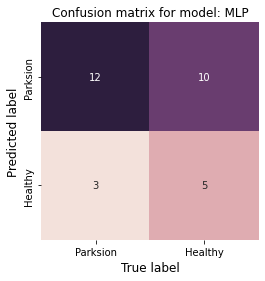

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns 
from matplotlib import pyplot as plt 

def evaluate_model(name, model):
  y_predict_train = mlp_model.predict(x_train)
  y_predict_test = mlp_model.predict(x_test)
  print("Evaluating Model: " + name)
  print("")

  print("1. Accuracy Score (training set) for " + name)
  print(accuracy_score(y_train, y_predict_train))
  print("")
  
  print("2. Classification Report (training set) for " + name)
  print(classification_report(y_train, y_predict_train))
  print("")  

  print("3. Accuracy Score (test set) for " + name)
  print(accuracy_score(y_test, y_predict_test))    
  print("")

  print("4. Classification Report (test set) for " + name)
  print(classification_report(y_test, y_predict_test))
  print("")
  
  print("5. Confusion Matrix for model: " + name)
  cmap = sns.cubehelix_palette(light= 0.9, as_cmap=True)
  cm = confusion_matrix(y_test, y_predict_test)
  sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
              xticklabels=['Parksion', 'Healthy'],
              yticklabels=['Parksion', 'Healthy'], cmap=cmap)
  
  plt.xlabel('True label', size=12)
  plt.ylabel('Predicted label', size=12)
  plt.title('Confusion matrix for model: ' + name)

evaluate_model('MLP',mlp_model)

In [ ]:
predict = mlp_model.predict(x_test)
predict_pro = mlp_model.predict_proba(x_test) 

score_1 = mlp_model.score(x_test, y_test)
print(predict)
print(len(predict))

print(list(y_test), sep = " ")
print(len(list(y_test)))

score_1

[1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0]
30
[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0]
30


0.5666666666666667

In [ ]:
data = ["/content/drive/Shareddrives/TRABALHO_IP/TESTE/augmented_Binary_0.png",
        "/content/drive/Shareddrives/TRABALHO_IP/TESTE/augmented_Binary_1.png",
        "/content/drive/Shareddrives/TRABALHO_IP/TESTE/augmented_Binary_2.png",
        "/content/drive/Shareddrives/TRABALHO_IP/TESTE/augmented_Binary_0.png",
        "/content/drive/Shareddrives/TRABALHO_IP/TESTE/augmented_Binary_1.png"]

In [ ]:
for i in data: 
  img = cv2.imread(i,0)
  img2 = cv2.resize(img, (256, 256)) # resize das imagens 
  img2 = np.where(img2 > 0.1, 1, 0)
  img = img2.flatten()
  img = img.reshape(1, -1)
  predict = mlp_model.predict(img)
  print(predict)
  

[0]
[1]
[1]
[0]
[1]


In [ ]:
from google.colab.patches import cv2_imshow
data = cv2.imread("/content/drive/Shareddrives/TRABALHO_IP/TESTE/augmented_Binary_0.png")
cv2_imshow(data[0])